In [33]:
import numpy as np
import pandas as pd
import pylab as pl


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


In [35]:
import matplotlib.cm as cm 
import seaborn as sns


In [36]:
df = pd.read_csv("1632300362534233.csv")
df.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [37]:
df = df.dropna()


In [38]:
df.count()


Area          3456
Room          3456
Parking       3456
Warehouse     3456
Elevator      3456
Address       3456
Price         3456
Price(USD)    3456
dtype: int64

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


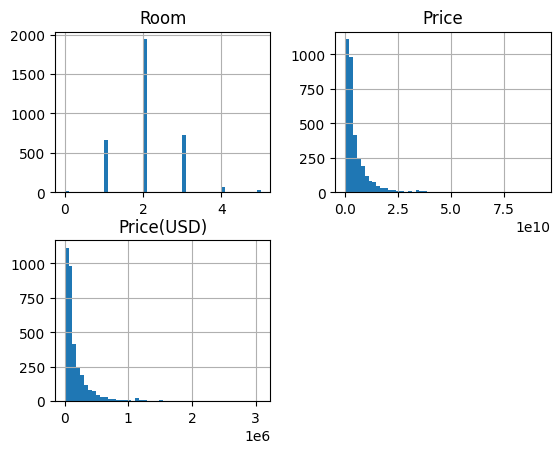

In [40]:
hist = df.hist(bins = 50)
plt.show()


In [41]:
df['Area']


0        63
1        60
2        79
3        95
4       123
       ... 
3474     86
3475     83
3476     75
3477    105
3478     82
Name: Area, Length: 3456, dtype: object

In [42]:
df['Area'] = df['Area'].str.replace(',', '')


In [43]:
df = df.astype({'Area': 'int64'})


In [44]:
for i in df.index:
    if df.loc[i, 'Area'] > 199:
        df.drop(i, inplace=True)
df['Area'].value_counts()


Area
75     111
100    103
90      95
60      94
105     92
      ... 
152      1
174      1
172      1
33       1
30       1
Name: count, Length: 158, dtype: int64

In [45]:
df['Area']


0        63
1        60
2        79
3        95
4       123
       ... 
3474     86
3475     83
3476     75
3477    105
3478     82
Name: Area, Length: 3219, dtype: int64

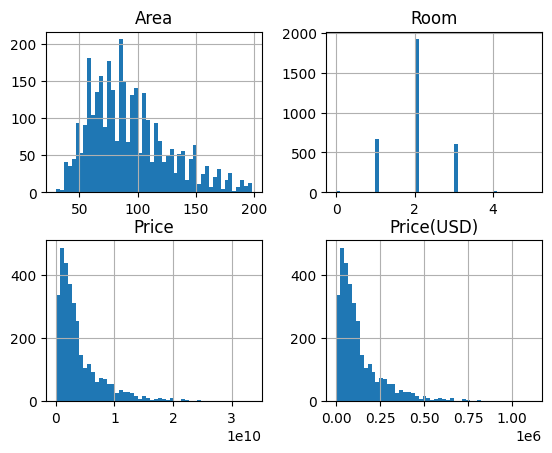

In [46]:
hist = df.hist(bins = 50)
plt.show()


In [47]:
df = df.replace({True: 1, False: 0})
df = df.astype({'Parking': 'int64'})
df = df.astype({'Warehouse': 'int64'})
df = df.astype({'Elevator': 'int64'})
df = df.dropna()
df.head()


C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_10524\1008499952.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [48]:
df = df.rename({'Price': 'Rial', 'Price(USD)': 'Doolar'}, axis = 1)
df.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Rial,Doolar
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [49]:
df = df.astype({'Rial': 'int64'})


In [50]:
df['Rial']


0       1850000000
1       1850000000
2        550000000
3        902500000
4       7000000000
           ...    
3474    3500000000
3475    6800000000
3476     365000000
3477    5600000000
3478     360000000
Name: Rial, Length: 3219, dtype: int64

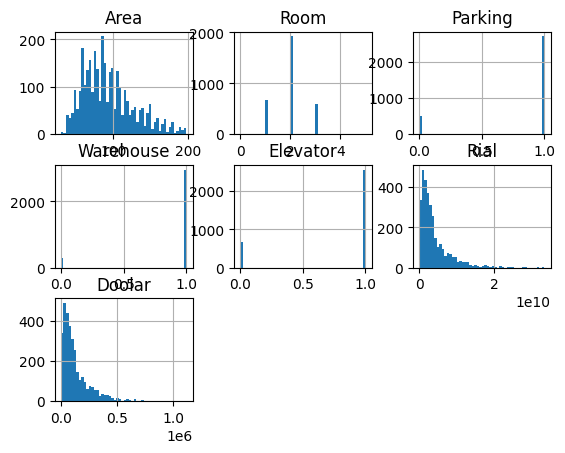

In [51]:
hist = df.hist(bins = 50)
plt.show()


In [52]:
df = df.astype({'Doolar': 'int64'})


In [53]:
df['Doolar']


0        61666
1        61666
2        18333
3        30083
4       233333
         ...  
3474    116666
3475    226666
3476     12166
3477    186666
3478     12000
Name: Doolar, Length: 3219, dtype: int64

In [54]:
cdf = df[["Area", "Room", "Parking", "Warehouse", "Elevator","Rial","Doolar"]]
cdf.head()

,Area,Room,Parking,Warehouse,Elevator,Rial,Doolar
0,63,1,1,1,1,1850000000,61666
1,60,1,1,1,1,1850000000,61666
2,79,2,1,1,1,550000000,18333
3,95,2,1,1,1,902500000,30083
4,123,2,1,1,1,7000000000,233333


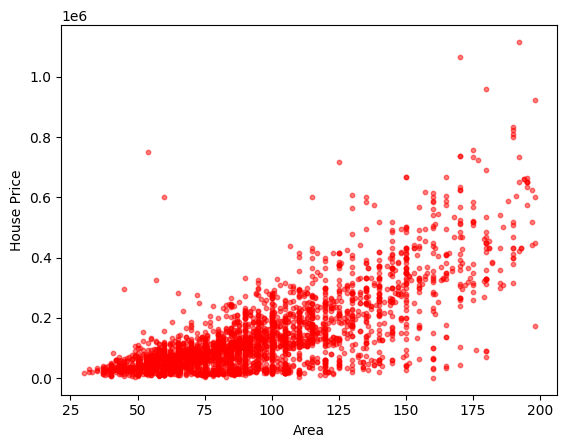

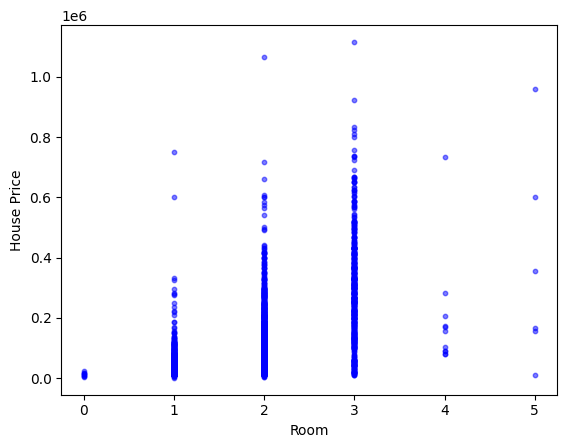

In [55]:
plt.scatter(cdf.Area, cdf.Doolar, color='red', s=10, alpha=0.5)
plt.xlabel("Area")
plt.ylabel("House Price")
plt.show()

plt.scatter(cdf.Room, cdf.Doolar, color='blue', s=10, alpha=0.5)
plt.xlabel("Room")
plt.ylabel("House Price")
plt.show()


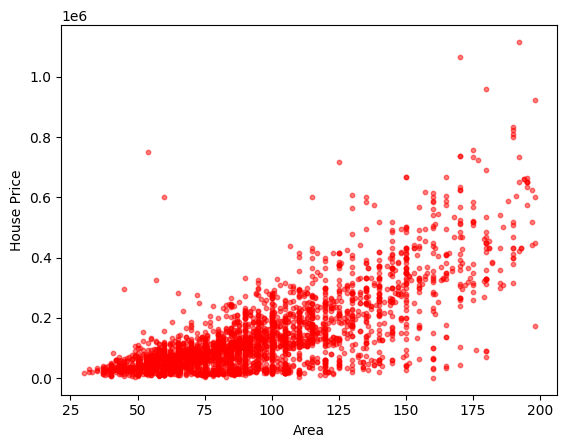

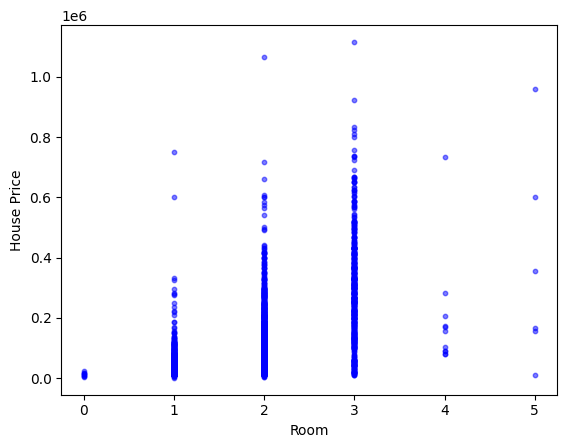

In [56]:
plt.scatter(cdf.Area, cdf.Doolar, color='red', s=10, alpha=0.5)
plt.xlabel("Area")
plt.ylabel("House Price")
plt.show()

plt.scatter(cdf.Room, cdf.Doolar, color='blue', s=10, alpha=0.5)
plt.xlabel("Room")
plt.ylabel("House Price")
plt.show()


In [57]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

regr = linear_model.LinearRegression()

x = np.asanyarray(train[['Area','Parking','Warehouse', 'Elevator']])
y = np.asanyarray(train[['Doolar']])

regr.fit(x, y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)




Coefficients:  [[ 2790.92396234 13533.43721035 11422.10514508  4970.92252712]]
Intercept:  [-155268.89445799]


In [62]:
y_hat = regr.predict(test[['Area','Parking','Warehouse', 'Elevator']])
x = np.asanyarray(test[['Area','Parking','Warehouse', 'Elevator']])
y = np.asanyarray(test[['Doolar']])

#print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))



Residual sum of squares (MSE): 7528389279.49
Variance score: 0.53


C:\Users\a.mohammadlou\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
